In [329]:
import pandas as pd
import numpy as np
import seaborn as sns
from factor_analyzer import FactorAnalyzer   
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

pewdata = pd.read_spss('C:\\Users\\richd\\Documents\\Personal\\School\\MSDS 411\\assn 1\\Mar19public.sav')
pewdata.shape

(1503, 129)

In [272]:
pewopinion = pewdata.iloc[:, 25:98]
num_nulls = pewopinion.isnull().sum()
cols_with_complete_data = num_nulls[num_nulls == 0]
pewwork = pewdata[[c for c in cols_with_complete_data.index]]
pewdf = pd.get_dummies(pewwork, drop_first=True)

In [273]:
num_nulls = pewopinion.isnull().sum()
cols_with_complete_data = num_nulls[num_nulls == 0]
cols_with_complete_data.shape
pewwork = pewdata[[c for c in cols_with_complete_data.index]]
pewwork.shape

(1503, 30)

In [274]:
pewdata.head()

,respid,sample,int_date,fcall,attempt,refusal,lang,cregion,state,usr,...,hh1,hh3,adults,ql1,ql1a,qc1,ll,cp,money2,weight
0,2.0,Landline,190320.0,190320.0,1.0,No,English,Northeast,NY,U,...,2.0,2.0,2,"Yes, have cell phone",NaN,NaN,Landline,Cellphone,NaN,1.150112
1,3.0,Landline,190320.0,190320.0,1.0,No,English,Northeast,PA,U,...,1.0,NaN,1,"No, do not",NaN,NaN,Landline,No cellphone,NaN,2.092222
2,4.0,Landline,190320.0,190320.0,1.0,No,English,South,FL,S,...,2.0,2.0,2,"Yes, have cell phone",NaN,NaN,Landline,Cellphone,NaN,0.963393
3,5.0,Landline,190320.0,190320.0,1.0,No,English,South,NC,R,...,2.0,2.0,2,"Yes, have cell phone",NaN,NaN,Landline,Cellphone,NaN,0.489359
4,6.0,Landline,190320.0,190320.0,1.0,No,English,Midwest,MI,R,...,4.0,3.0,3 or more,"Yes, have cell phone",NaN,NaN,Landline,Cellphone,NaN,1.930009


In [275]:
pewdata['sdensity'].value_counts()

4.0        356
3.0        311
Highest    294
2.0        290
Lowest     252
Name: sdensity, dtype: int64

In [276]:
pewdata['income'].value_counts()

$150,000 or more              230
50 to under $75,000           213
100 to under $150,000 [OR]    199
75 to under $100,000          198
20 to under $30,000           127
(VOL) Don't know/Refused      125
10 to under $20,000           118
30 to under $40,000           112
40 to under $50,000           104
Less than $10,000              77
Name: income, dtype: int64

In [277]:
pewdata['partysumideo'].value_counts()

Cons Rep/ln Rep            441
Cons-Mod Dem/ln Dem        373
Lib Dem/ln Dem             324
Mod-Lib Rep/ln Rep         205
DK/Ref to party or ideo     52
Name: partysumideo, dtype: int64

In [278]:
pewdata_2 = pewdata.copy()

In [279]:
ideo_map = {'Cons Rep/ln Rep': 1, 'Mod-Lib Rep/ln Rep': 2, 'DK/Ref to party or ideo': 3,
           'Cons-Mod Dem/ln Dem': 4, 'Lib Dem/ln Dem': 5}
income_map = {"(VOL) Don't know/Refused": 0,'Less than $10,000': 1, '10 to under $20,000': 1, '20 to under $30,000': 2,
             '30 to under $40,000': 2, '40 to under $50,000': 3, '50 to under $75,000': 3, '75 to under $100,000': 4,
             '100 to under $150,000 [OR]': 4, '$150,000 or more': 5}
sdensity_map = {'Highest': 5, 'Lowest': 1, 2: 2, 3: 3, 4: 4}


In [280]:
pewdata_2['income'] = pewdata_2['income'].map(income_map)
pewdata_2['sdensity'] = pewdata_2['sdensity'].map(sdensity_map)

pewdata_2['partysumideo'] = pewdata_2['partysumideo'].fillna('DK/Ref to party or ideo')
pewdata_2['partysumideo'] = pewdata_2['partysumideo'].map(ideo_map)

In [281]:
for col in pewwork:
    print(col)
    print(pewwork[col].unique())

q1
['Dissatisfied', '(VOL) Don't know/Refused', 'Satisfied']
Categories (3, object): ['(VOL) Don't know/Refused', 'Dissatisfied', 'Satisfied']
q2
['Disapprove', 'Approve', '(VOL) Don't know/Refused']
Categories (3, object): ['(VOL) Don't know/Refused', 'Approve', 'Disapprove']
q19
['Some of the time', 'Most of the time', 'Only now and then', 'Hardly at all', '(VOL) Don't know/Refused']
Categories (5, object): ['(VOL) Don't know/Refused', 'Hardly at all', 'Most of the time', 'Only now and then', 'Some of the time']
q20
['Frustrated', 'Angry', 'Basically content', '(VOL) Don't know/Refused']
Categories (4, object): ['(VOL) Don't know/Refused', 'Angry', 'Basically content', 'Frustrated']
q25
['Only some of the time', '(VOL) Never', 'Most of the time', '(VOL) Don't know/Refused', 'Just about always']
Categories (5, object): ['(VOL) Don't know/Refused', '(VOL) Never', 'Just about always', 'Most of the time', 'Only some of the time']
q47
['No, not keeping promises', '(VOL) Don't know/Refused

In [282]:
q1_map = {'Dissatisfied': 1, "(VOL) Don't know/Refused": 2, 'Satisfied':3}
q2_map = {'Disapprove': 1, "(VOL) Don't know/Refused": 2, 'Approve':3}
q19_map = {'Some of the time': 3, 'Most of the time': 4, 'Only now and then': 2, 'Hardly at all': 1,
           "(VOL) Don't know/Refused": 0}
q20_map = {'Frustrated': 2, 'Angry': 3, 'Basically content': 1, "(VOL) Don't know/Refused": 0}
q25_map = {'Only some of the time': 2, '(VOL) Never': 1, 'Most of the time': 3, "(VOL) Don't know/Refused": 0,
           'Just about always': 4}
q47_map = {"Yes, keeping promises" : 3, "No, not keeping promises" : 1, "(VOL) Don't know/Refused" : 2}
q50a_map = {"Statement #1" : 1, "Statement #2" : 2, "(VOL) Neither/Both equally" : 0, "(VOL) Don't know/Refused" : 0}
q50b_map = {"Statement #1" : 1, "Statement #2" : 2, "(VOL) Neither/Both equally" : 0, "(VOL) Don't know/Refused" : 0}
q50c_map = {"Statement #1" : 1, "Statement #2" : 2, "(VOL) Neither/Both equally" : 0, "(VOL) Don't know/Refused" : 0}
q50d_map = {"Statement #1" : 1, "Statement #2" : 2, "(VOL) Neither/Both equally" : 0, "(VOL) Don't know/Refused" : 0}
q50e_map = {"Statement #1" : 1, "Statement #2" : 2, "(VOL) Neither/Both equally" : 0, "(VOL) Don't know/Refused" : 0}
q58_map = {"Strongly favor" : 1, "Favor" : 2, "Oppose" : 3, "Strongly oppose" : 4, "(VOL) Don't know/Refused" : 0}
q60_map = {"Sometimes fair game [OR IS IT]" : 1, "Never fair game" : 2, "(VOL) Other/Depends" : 0,
           "(VOL) Don't know/Refused" : 0}
q61a_map = {"A lot" : 4, "Some" : 3, "Only a little" : 2, "None at all" : 1, "(VOL) Don't know/Refused" : 0}
q61b_map = {"A lot" : 4, "Some" : 3, "Only a little" : 2, "None at all" : 1, "(VOL) Don't know/Refused" : 0}
q61c_map = {"A lot" : 4, "Some" : 3, "Only a little" : 2, "None at all" : 1, "(VOL) Don't know/Refused" : 0}
q64_map = {"Very fair" : 1, "Moderately fair" : 2, "Not too fair" : 3, "Not fair at all" : 4,
           "(VOL) Don't know/Refused" : 0}
q65a_map = {"A lot" : 4, "Some" : 3, "Not too much" : 2, "Not at all" : 1, "(VOL) Don't know/Refused" : 0}
q65b_map = {"A lot" : 4, "Some" : 3, "Not too much" : 2, "Not at all" : 1, "(VOL) Don't know/Refused" : 0}
q65c_map = {"A lot" : 4, "Some" : 3, "Not too much" : 2, "Not at all" : 1, "(VOL) Don't know/Refused" : 0}
q65d_map = {"A lot" : 4, "Some" : 3, "Not too much" : 2, "Not at all" : 1, "(VOL) Don't know/Refused" : 0}
q65e_map = {"A lot" : 4, "Some" : 3, "Not too much" : 2, "Not at all" : 1, "(VOL) Don't know/Refused" : 0}
q66_map = {"Increasing influence" : 1, "Losing influence" : 2, "(VOL) Same" : 1.5, "(VOL) Don't know/Refused" : 0}
q68a_map = {"Friendly toward religion" : 1, "Neutral toward religion" : 2, "Unfriendly toward religion" : 3,
            "(VOL) Don't know/Refused" : 0}
q68b_map = {"Friendly toward religion" : 1, "Neutral toward religion" : 2, "Unfriendly toward religion" : 3,
            "(VOL) Don't know/Refused" : 0}
q68d_map = {"Friendly toward religion" : 1, "Neutral toward religion" : 2, "Unfriendly toward religion" : 3,
            "(VOL) Don't know/Refused" : 0}
q69_map = {"Should keep out of political matters" : 1,
           "Should express their views on day-to-day social and political questions" : 3, "(VOL) Other/Depends" : 2,
           "(VOL) Don't know/Refused" : 0}
q70_map = {"Approve" : 1, "Disapprove" : 2, "(VOL) Don't know/Refused" : 0}
q71_map = {"Very well" : 1, "Somewhat well" : 2, "Not too well" : 3, "Not at all well" : 4,
           "(VOL) Don't know/Refused" : 0}
q75_map = {"A lot" : 1, "A little" : 2, "Nothing at all" : 3, "(VOL) Don't know/Refused" : 0}

In [284]:
pewdata_2['q1'] = pewdata_2['q1'].map(q1_map)
pewdata_2['q2'] = pewdata_2['q2'].map(q2_map)
pewdata_2['q19'] = pewdata_2['q19'].map(q19_map)
pewdata_2['q20'] = pewdata_2['q20'].map(q20_map)
pewdata_2['q25'] = pewdata_2['q25'].map(q25_map)
pewdata_2['q47'] = pewdata_2['q47'].map(q47_map)
pewdata_2['q50a'] = pewdata_2['q50a'].map(q50a_map)
pewdata_2['q50b'] = pewdata_2['q50b'].map(q50b_map)
pewdata_2['q50c'] = pewdata_2['q50c'].map(q50c_map)
pewdata_2['q50d'] = pewdata_2['q50d'].map(q50d_map)
pewdata_2['q50e'] = pewdata_2['q50e'].map(q50e_map)
pewdata_2['q58'] = pewdata_2['q58'].map(q58_map)
pewdata_2['q60'] = pewdata_2['q60'].map(q60_map)
pewdata_2['q61a'] = pewdata_2['q61a'].map(q61a_map)
pewdata_2['q61b'] = pewdata_2['q61b'].map(q61b_map)
pewdata_2['q61c'] = pewdata_2['q61c'].map(q61c_map)
pewdata_2['q64'] = pewdata_2['q64'].map(q64_map)
pewdata_2['q65a'] = pewdata_2['q65a'].map(q65a_map)
pewdata_2['q65b'] = pewdata_2['q65b'].map(q65b_map)
pewdata_2['q65c'] = pewdata_2['q65c'].map(q65c_map)
pewdata_2['q65d'] = pewdata_2['q65d'].map(q65d_map)
pewdata_2['q65e'] = pewdata_2['q65e'].map(q65e_map)
pewdata_2['q66'] = pewdata_2['q66'].map(q66_map)
pewdata_2['q68a'] = pewdata_2['q68a'].map(q68a_map)
pewdata_2['q68b'] = pewdata_2['q68b'].map(q68b_map)
pewdata_2['q68d'] = pewdata_2['q68d'].map(q68d_map)
pewdata_2['q69'] = pewdata_2['q69'].map(q69_map)
pewdata_2['q70'] = pewdata_2['q70'].map(q70_map)
pewdata_2['q71'] = pewdata_2['q71'].map(q71_map)
pewdata_2['q75'] = pewdata_2['q75'].map(q75_map)

In [285]:
pewdata_2.head()

,respid,sample,int_date,fcall,attempt,refusal,lang,cregion,state,usr,...,hh1,hh3,adults,ql1,ql1a,qc1,ll,cp,money2,weight
0,2.0,Landline,190320.0,190320.0,1.0,No,English,Northeast,NY,U,...,2.0,2.0,2,"Yes, have cell phone",NaN,NaN,Landline,Cellphone,NaN,1.150112
1,3.0,Landline,190320.0,190320.0,1.0,No,English,Northeast,PA,U,...,1.0,NaN,1,"No, do not",NaN,NaN,Landline,No cellphone,NaN,2.092222
2,4.0,Landline,190320.0,190320.0,1.0,No,English,South,FL,S,...,2.0,2.0,2,"Yes, have cell phone",NaN,NaN,Landline,Cellphone,NaN,0.963393
3,5.0,Landline,190320.0,190320.0,1.0,No,English,South,NC,R,...,2.0,2.0,2,"Yes, have cell phone",NaN,NaN,Landline,Cellphone,NaN,0.489359
4,6.0,Landline,190320.0,190320.0,1.0,No,English,Midwest,MI,R,...,4.0,3.0,3 or more,"Yes, have cell phone",NaN,NaN,Landline,Cellphone,NaN,1.930009


In [286]:
cols = list(range(73))
cols = [x + 25 for x in cols]
cols.append(13)
cols.append(111)
cols.append(118)
print(cols)
#pewdata_2.iloc[:]

[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 13, 111, 118]


In [287]:
pewdata_2 = pewdata_2.iloc[:, cols]

In [288]:
pewdata_2.isnull().sum(axis=1)

0       26
1       26
2       21
3       27
4       26
        ..
1498    20
1499    22
1500    20
1501    20
1502    21
Length: 1503, dtype: int64

In [289]:
num_nulls = pewdata_2.isnull().sum()
cols_with_complete_data = num_nulls[num_nulls == 0]
cols_with_complete_data.shape
pewwork = pewdata_2[[c for c in cols_with_complete_data.index]]
pewwork.shape

(1503, 33)

In [290]:
pewwork.isnull().sum(axis=1).sum()

0

In [291]:
pewwork.head(33)

,q1,q2,q19,q20,q25,q47,q50a,q50b,q50c,q50d,...,q68a,q68b,q68d,q69,q70,q71,q75,sdensity,income,partysumideo
0,1,1,3,2,2,1,2,0,2,0,...,0,3,1,0,2,4,1,3,1,3
1,1,1,3,2,1,2,1,2,2,2,...,0,3,3,3,2,3,1,5,1,4
2,2,3,4,2,2,1,2,1,2,2,...,1,1,2,3,1,3,1,3,5,2
3,3,3,4,3,1,1,2,1,2,0,...,3,2,2,3,0,4,1,1,0,1
4,1,1,4,2,2,3,1,1,1,1,...,3,3,2,1,2,1,1,1,2,5
5,3,3,4,1,2,1,2,1,2,2,...,2,2,2,1,1,2,2,2,3,1
6,3,3,4,3,1,1,2,1,1,2,...,3,2,2,1,1,1,1,1,3,2
7,1,3,3,1,3,2,2,1,1,2,...,2,2,2,3,0,4,1,2,0,4
8,1,1,4,2,2,3,1,1,1,1,...,2,2,2,3,2,1,1,1,4,5
9,1,1,4,2,2,3,1,1,1,1,...,2,1,2,3,2,1,1,2,4,5


In [292]:
pewwork = pewwork.astype('int64')

In [293]:
a = pewwork.corr()
print(a)

                    q1        q2       q19       q20       q25       q47  \
q1            1.000000  0.513014 -0.046915 -0.260695  0.186629 -0.178521   
q2            0.513014  1.000000  0.057121 -0.128257  0.068153 -0.415159   
q19          -0.046915  0.057121  1.000000  0.185307 -0.024174  0.033604   
q20          -0.260695 -0.128257  0.185307  1.000000 -0.210050  0.034581   
q25           0.186629  0.068153 -0.024174 -0.210050  1.000000  0.048872   
q47          -0.178521 -0.415159  0.033604  0.034581  0.048872  1.000000   
q50a          0.254101  0.295476  0.108103 -0.082215  0.087378 -0.154788   
q50b          0.164719  0.325009 -0.021637 -0.016615  0.013958 -0.227588   
q50c          0.108467  0.153295 -0.087655 -0.017272 -0.041131 -0.146759   
q50d          0.324844  0.432593  0.085881 -0.096779  0.144438 -0.185086   
q50e          0.090190  0.197793 -0.076646 -0.051304  0.016398 -0.092951   
q58           0.131481  0.281503 -0.044078 -0.019119  0.008106 -0.213587   
q60         

<AxesSubplot: >

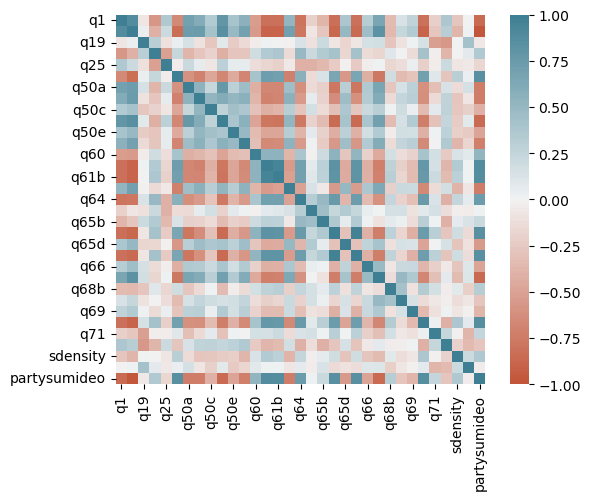

In [294]:
# Youtube inspiration here https://www.youtube.com/watch?v=jRjeC9Bre8M
sns.heatmap(
    data = a.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

In [295]:
eigenvalues, eigenvectors = np.linalg.eig(a)
e = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[e]                  # https://stackoverflow.com/questions/8092920/sort-eigenvalues-and-associated-eigenvectors-after-using-numpy-linalg-eig-in-pyt
eigenvectors = eigenvectors[:, e]

In [322]:
print(eigenvalues)
print(eigenvalues.shape)

[5.79612892 2.43088004 2.00669709 1.49529021 1.30079861 1.22162706
 1.08466601 1.06343783 1.00191287 0.96780296 0.920236   0.89573248
 0.8745693  0.84065164 0.82786513 0.81763356 0.79023128 0.74687388
 0.7429348  0.68309217 0.6724778  0.63257872 0.61086916 0.60352547
 0.59071686 0.56201645 0.55597248 0.53709922 0.50281406 0.34336165
 0.34041854 0.30359988 0.23548786]
(33,)


In [325]:
print(eigenvalues[eigenvalues > 0.99999])
print(len(eigenvalues[eigenvalues > 0.99999]))

[5.79612892 2.43088004 2.00669709 1.49529021 1.30079861 1.22162706
 1.08466601 1.06343783 1.00191287]
9


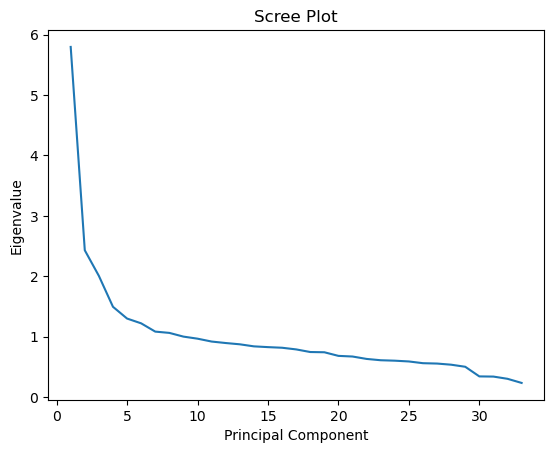

5.8 variation= 17 %  total= 17 %
2.43 variation= 7 %  total= 24 %
2.01 variation= 6 %  total= 31 %
1.5 variation= 4 %  total= 35 %
1.3 variation= 3 %  total= 39 %
1.22 variation= 3 %  total= 43 %
1.08 variation= 3 %  total= 46 %
1.06 variation= 3 %  total= 49 %
1.0 variation= 3 %  total= 52 %
0.97 variation= 2 %  total= 55 %
0.92 variation= 2 %  total= 58 %
0.9 variation= 2 %  total= 61 %
0.87 variation= 2 %  total= 63 %
0.84 variation= 2 %  total= 66 %
0.83 variation= 2 %  total= 68 %
0.82 variation= 2 %  total= 71 %
0.79 variation= 2 %  total= 73 %
0.75 variation= 2 %  total= 76 %
0.74 variation= 2 %  total= 78 %
0.68 variation= 2 %  total= 80 %
0.67 variation= 2 %  total= 82 %
0.63 variation= 1 %  total= 84 %
0.61 variation= 1 %  total= 86 %
0.6 variation= 1 %  total= 87 %
0.59 variation= 1 %  total= 89 %
0.56 variation= 1 %  total= 91 %
0.56 variation= 1 %  total= 93 %
0.54 variation= 1 %  total= 94 %
0.5 variation= 1 %  total= 96 %
0.34 variation= 1 %  total= 97 %
0.34 variation= 

In [326]:
# Create the scree plot
plt.plot(range(1, len(eigenvalues)+1), eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title("Scree Plot")
plt.show()

varPCT = []
totPCT = []
total = 0
for i in eigenvalues:
    total = total + i
    VAR = int( i / len(eigenvalues) * 100)
    PCT = int( total / len(eigenvalues) * 100)
    varPCT.append( VAR )
    totPCT.append( PCT )
    print( round(i, 2), "variation=", VAR, "%", " total=", PCT, "%")
    

In [327]:
pca_all = PCA(n_components=a.shape[1])
principal_components_all = pca_all.fit_transform(a)
pca_all.explained_variance_

array([1.04811657e+00, 1.26824161e-01, 1.24602700e-01, 5.84172269e-02,
       4.68795871e-02, 4.17697840e-02, 3.65753779e-02, 3.22228184e-02,
       3.10581950e-02, 2.90318742e-02, 2.61970956e-02, 2.41157633e-02,
       2.29004707e-02, 2.20683541e-02, 2.10815042e-02, 1.95663791e-02,
       1.85978849e-02, 1.72675919e-02, 1.53143137e-02, 1.45296246e-02,
       1.29704315e-02, 1.17464194e-02, 1.14433135e-02, 1.10550919e-02,
       1.05243173e-02, 9.67787288e-03, 9.02011800e-03, 7.97177585e-03,
       4.70450131e-03, 3.67441897e-03, 3.10885298e-03, 2.81725607e-03,
       1.62217855e-33])

In [330]:
a_df['ev'].sum()

1.8758516508695904

In [328]:
len(pca_all.explained_variance_)
a_df = pd.DataFrame(pca_all.explained_variance_, columns=['ev'])
a_df['cumsum'] = a_df['ev'].cumsum()
a_df.head()
var_75 = a_df['ev'].sum() * 0.75
pca_75_pct = a_df[a_df['cumsum'] < var_75]
print(pca_75_pct)
print("\n",pca_75_pct.shape[0])

         ev    cumsum
0  1.048117  1.048117
1  0.126824  1.174941
2  0.124603  1.299543
3  0.058417  1.357961
4  0.046880  1.404840

 5


In [238]:
fa = FactorAnalyzer(n_factors=5, rotation=None)
fa.fit(a)

FactorAnalyzer(n_factors=5, rotation=None, rotation_kwargs={})

In [239]:
pcs = []
for i in range(5):
    s = "PC "
    pc = s + str(i + 1)
    pcs.append(pc)
print(pcs)

['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5']


In [240]:
loadings = pd.DataFrame(fa.loadings_, columns=pcs, index=a.columns)

In [241]:
print('Factor Loadings \n%s' %loadings)

Factor Loadings 
                  PC 1      PC 2      PC 3      PC 4      PC 5
q1            0.885449 -0.002638 -0.236087 -0.043019  0.069898
q2            0.984802 -0.063745  0.046539 -0.087293 -0.042474
q19          -0.035349 -0.833159  0.137787 -0.068903 -0.170550
q20          -0.442844 -0.214862  0.430001 -0.056971 -0.209626
q25           0.228418  0.041589 -0.569730  0.018170 -0.022466
q47          -0.824790 -0.075184 -0.320318  0.033607  0.004695
q50a          0.760041 -0.259625 -0.084842  0.059864  0.153691
q50b          0.750831  0.115247  0.175350 -0.006934  0.076215
q50c          0.439578  0.343016  0.210124 -0.028280  0.098361
q50d          0.875972 -0.175244 -0.141138  0.015763  0.060578
q50e          0.517293  0.294876  0.077875  0.022589  0.071630
q58           0.716124  0.219808  0.150413 -0.013688 -0.153312
q60          -0.549149  0.010389 -0.005839  0.005113 -0.120626
q61a         -0.909106 -0.014846 -0.009101  0.029507 -0.029256
q61b         -0.899680  0.020212  0.02

In [333]:
PC1 = loadings[(loadings['PC 1'] > .3) | (loadings['PC 1'] < -.3)]['PC 1']
pd.set_option('display.max_rows', 500)
print(PC1)

q1              0.885449
q2              0.984802
q20            -0.442844
q47            -0.824790
q50a            0.760041
q50b            0.750831
q50c            0.439578
q50d            0.875972
q50e            0.517293
q58             0.716124
q60            -0.549149
q61a           -0.909106
q61b           -0.899680
q61c            0.677879
q64            -0.815610
q65b           -0.330845
q65c           -0.903426
q65d            0.504566
q65e           -0.889064
q66             0.456621
q68a            0.818509
q69             0.376571
q70            -0.869795
q75             0.363045
sdensity       -0.353910
partysumideo   -0.979501
Name: PC 1, dtype: float64


In [259]:
PC2 = loadings[(loadings['PC 2'] > .3) | (loadings['PC 2'] < -.3)]['PC 2']
print(PC2)

q19      -0.833159
q50c      0.343016
q68b      0.331872
q71       0.585323
q75       0.564803
income   -0.610232
Name: PC 2, dtype: float64


In [260]:
PC3 = loadings[(loadings['PC 3'] > .3) | (loadings['PC 3'] < -.3)]['PC 3']
print(PC3)

q20     0.430001
q25    -0.569730
q47    -0.320318
q61c    0.312799
q65a    0.691793
q65b    0.531386
q65d    0.341224
q68a    0.307591
q68d    0.391107
q75    -0.307567
Name: PC 3, dtype: float64


In [261]:
PC4 = loadings[(loadings['PC 4'] > .3) | (loadings['PC 4'] < -.3)]['PC 4']
print(PC4)

q68b    0.609028
q68d    0.610949
Name: PC 4, dtype: float64


In [262]:
PC5 = loadings[(loadings['PC 5'] > .3) | (loadings['PC 5'] < -.3)]['PC 5']
print(PC5)

q65a        0.337243
sdensity    0.406522
Name: PC 5, dtype: float64


In [302]:
# look at top 2 features
pca = PCA(n_components=2)
principal_components = pca.fit_transform(pewwork)
principal_df = pd.DataFrame(data = principal_components,
                           columns = ['principal component 1', 'principal component 2'])

In [303]:
principal_df

,principal component 1,principal component 2
0,-1.320736,2.477640
1,-1.262814,1.716071
2,2.781685,-1.756304
3,2.981205,3.704708
4,-2.878067,1.285126
...,...,...
1498,-2.125793,1.453587
1499,1.962196,-0.067864
1500,-3.956004,1.538386
1501,4.923312,0.182582


In [304]:
pewwork[['partysumideo']]

,partysumideo
0,3
1,4
2,2
3,1
4,5
...,...
1498,5
1499,1
1500,5
1501,1


In [305]:
pca.explained_variance_ratio_

array([0.20939153, 0.09087801])

In [306]:
party_ideo_df = pd.concat([principal_df, pewwork[['partysumideo']]], axis=1)

In [307]:
party_ideo_df

,principal component 1,principal component 2,partysumideo
0,-1.320736,2.477640,3
1,-1.262814,1.716071,4
2,2.781685,-1.756304,2
3,2.981205,3.704708,1
4,-2.878067,1.285126,5
...,...,...,...
1498,-2.125793,1.453587,5
1499,1.962196,-0.067864,1
1500,-3.956004,1.538386,5
1501,4.923312,0.182582,1


In [309]:
ideo_map_back = {1:'Cons Rep/ln Rep', 2: 'Mod-Lib Rep/ln Rep', 3: 'DK/Ref to party or ideo',
           4: 'Cons-Mod Dem/ln Dem', 5:'Lib Dem/ln Dem'}
party_ideo_df['partysumideo'] = party_ideo_df['partysumideo'].map(ideo_map_back)

C:\Users\richd\AppData\Local\Temp\ipykernel_79752\1217293403.py:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.scatterplot(


<AxesSubplot: xlabel='principal component 1', ylabel='principal component 2'>

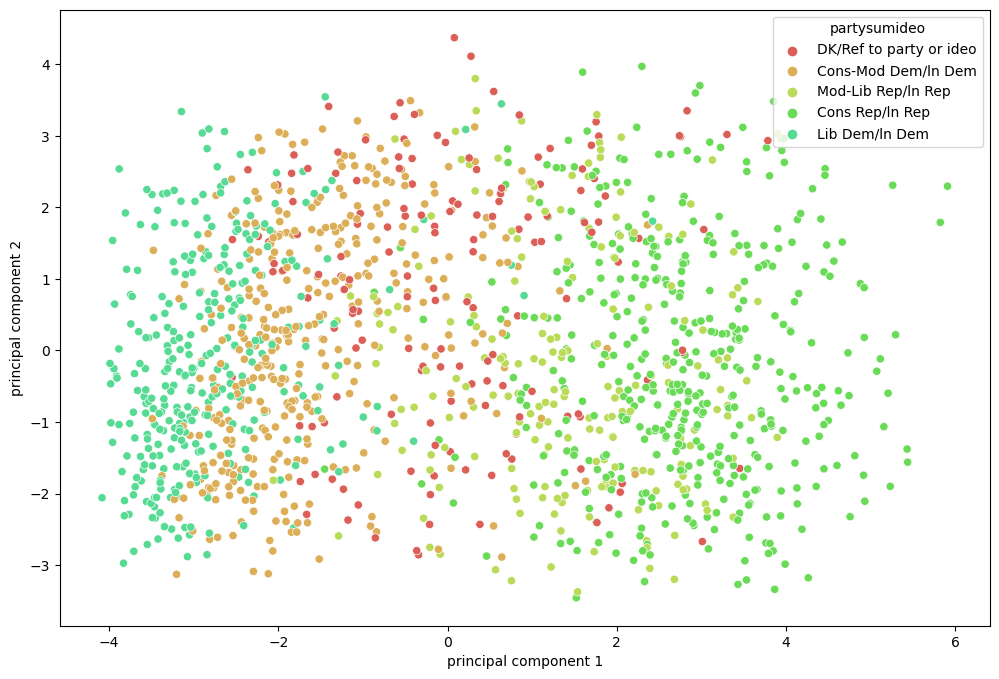

In [310]:
# Scatter plot to vsualize
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="partysumideo",
    palette=sns.color_palette("hls", 10),
    data=party_ideo_df)

In [312]:
pca_all.components_[0]

array([ 0.24765099,  0.34986338, -0.00137775, -0.0867327 ,  0.04268989,
       -0.21062727,  0.17890696,  0.16737099,  0.08133694,  0.23456037,
        0.09912558,  0.15575126, -0.10904966, -0.26154752, -0.25507945,
        0.15216281, -0.20067555, -0.01903889, -0.05966886, -0.26860087,
        0.09828919, -0.25536897,  0.08716403,  0.21380108, -0.05760392,
        0.04653175,  0.07058497, -0.23259631, -0.04421588,  0.06957296,
       -0.06421557,  0.00109251, -0.34392888])